<a href="https://colab.research.google.com/github/BrayanArismendi1997/Curso-IA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =============================================================================
# PCA
# =============================================================================
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
### Data Preprocessing
# Dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/BrayanArismendi1997/BasesdedatosBrayan/main/house_prices.csv', encoding='utf-8')
#El argumento encoding='utf-8' se utiliza para especificar la codificación del archivo CSV (UTF-8 en este caso).

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dataset.isnull().any(axis=None)


True

In [6]:
dataset.isnull().sum().sum()


7829

In [7]:
# Eliminar columnas con NaN
dataset_f = dataset[["MSSubClass", "LotFrontage", "LotArea",
             "GarageYrBlt", "GarageCars", "GarageArea",
             "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
             "ScreenPorch", "PoolArea", "YrSold", "SalePrice"]].dropna()


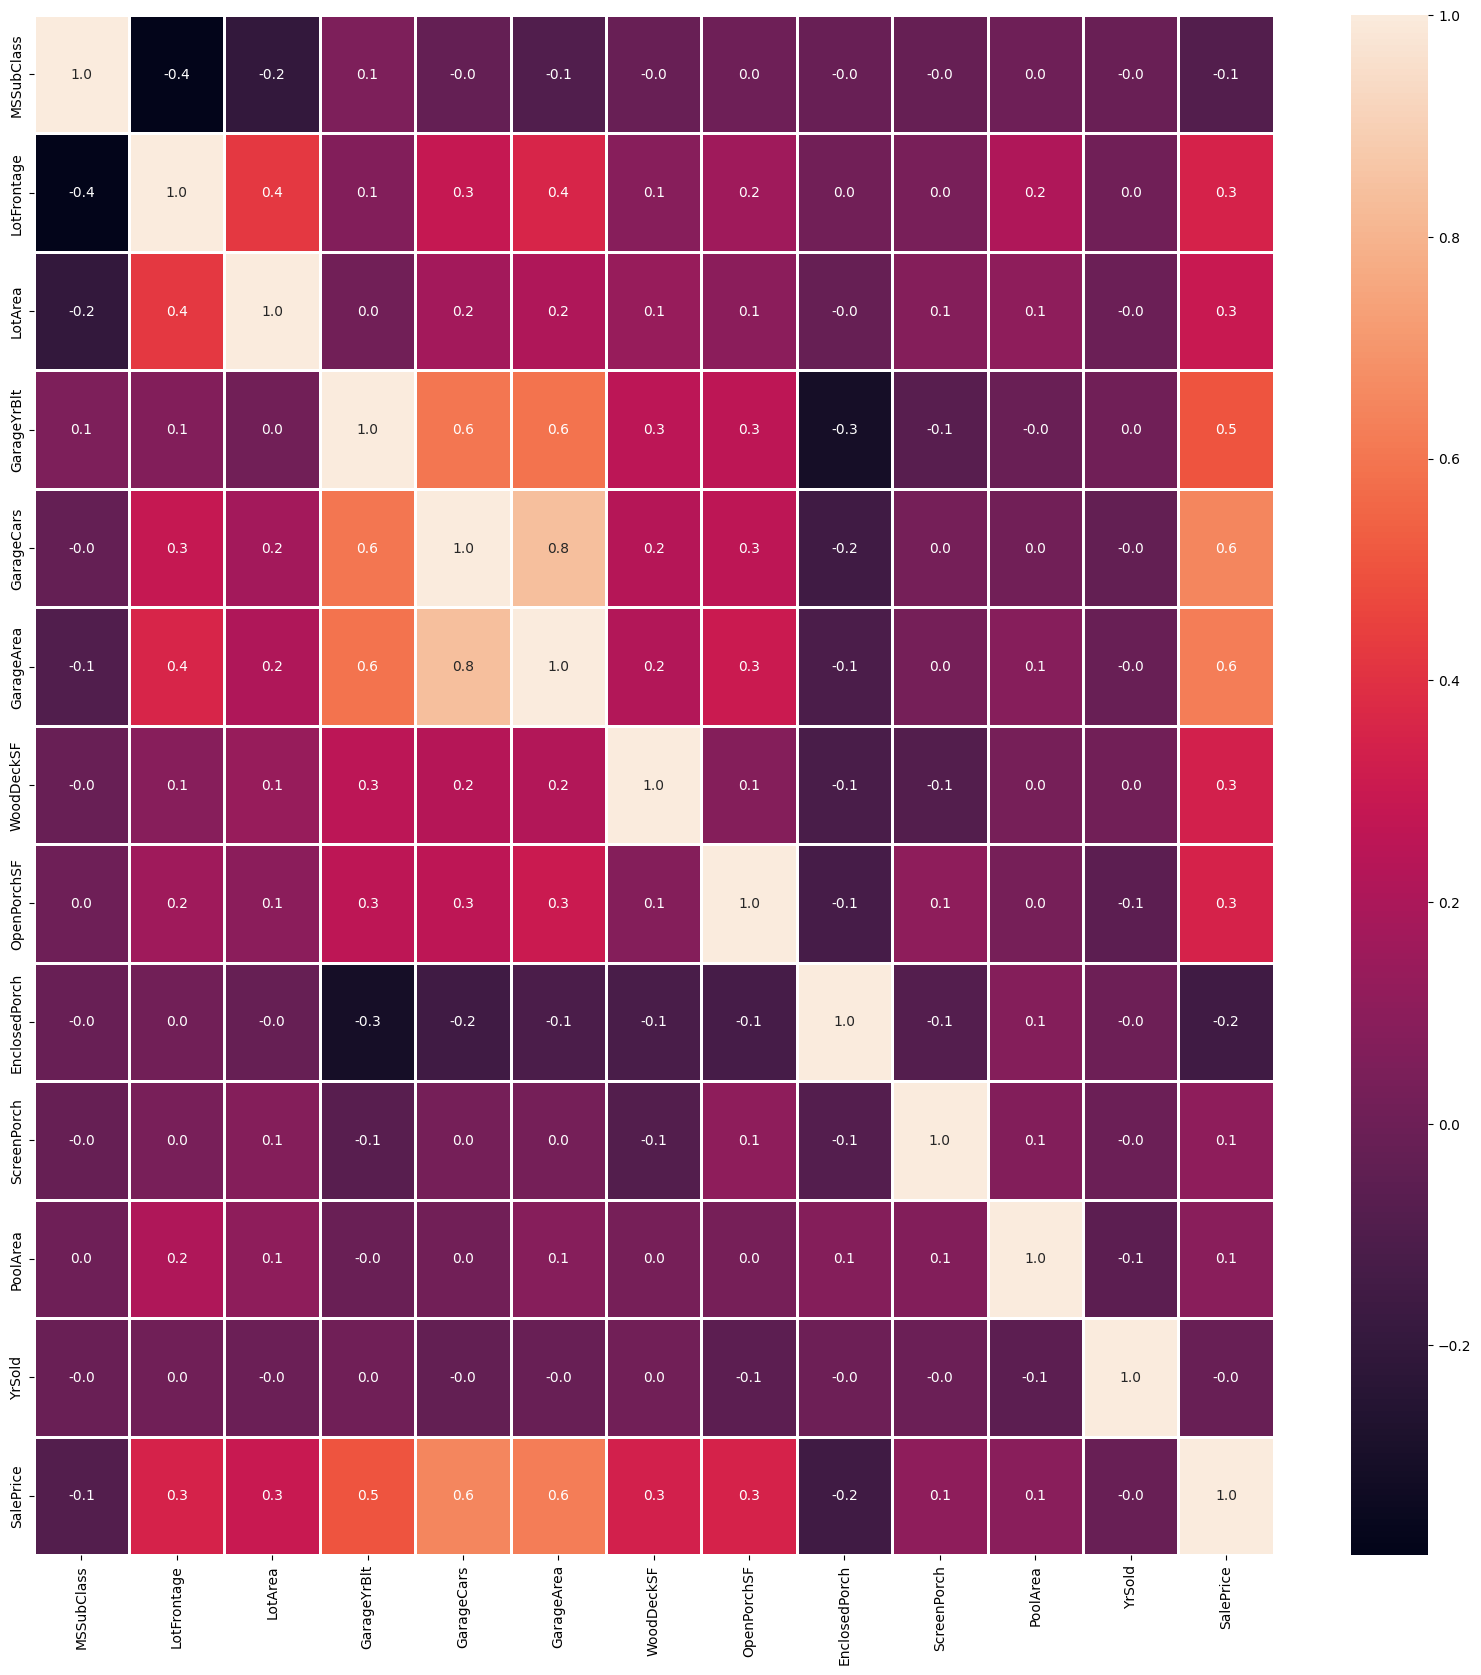

In [8]:

dataset_f.describe()

f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset_f.corr(method='pearson'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

In [10]:
X = dataset_f.iloc[:, 0:len(dataset_f.columns)-1].values
y = dataset_f.iloc[:, len(dataset_f.columns)-1].values

#X = dataset_f.iloc[:, 0:len(dataset_f.columns)-1].values:
##[:, 0:len(dataset_f.columns)-1] selecciona todas las filas (:) y todas las columnas excepto la última (0:len(dataset_f.columns)-1).
##Esto se utiliza para crear una matriz X que contiene todas las características (variables independientes) del conjunto de datos.

#y = dataset_f.iloc[:, len(dataset_f.columns)-1].values:
##[:, len(dataset_f.columns)-1] selecciona todas las filas (:) y solo la última columna (len(dataset_f.columns)-1).
##Esto se utiliza para crear un vector y que contiene la variable objetivo (variable dependiente) del conjunto de datos.

#En resumen, X contendrá todas las características (excepto la última columna), y y contendrá la variable objetivo (la última columna).

In [12]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#X y y son las matrices o vectores que contienen las características (variables independientes) y la variable objetivo (variable dependiente), respectivamente.
#test_size=0.25 indica que el 25% de los datos se utilizarán para el conjunto de prueba (X_test e y_test),
#mientras que el 75% restante se utilizará para el conjunto de entrenamiento (X_train e y_train).
#random_state=0 establece una semilla para la generación de números aleatorios, lo que garantiza que la división sea reproducible.

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit_transform ajusta el escalador a los datos de entrenamiento (X_train) y luego transforma esos datos.
#Esto escala las características en X_train para que tengan una media de 0 y una desviación estándar de 1.
#X_test = sc.transform(X_test):
#transform aplica la misma transformación a los datos de prueba (X_test) utilizando los parámetros aprendidos durante el ajuste en los datos de entrenamiento.
#Esto asegura que las características en X_test estén escaladas de la misma manera que las características en X_train.

In [16]:
### PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None) # 'None' para que conserven en principio todas las PC

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#from sklearn.decomposition import PCA: Importamos la clase PCA de la biblioteca scikit-learn.
#pca = PCA(n_components=None): Creamos una instancia de PCA. El argumento n_components=None significa que queremos conservar todas las componentes principales.
#X_train_pca = pca.fit_transform(X_train): Ajustamos el PCA a los datos de entrenamiento (X_train) y transformamos los datos en un nuevo conjunto de características (X_train_pca).
#X_test_pca = pca.transform(X_test): Transformamos los datos de prueba (X_test) utilizando los parámetros aprendidos durante el ajuste en los datos de entrenamiento.

In [17]:
"""
Se crea este vector para que  diga la varianza explicada por cada escenario de PCAs y
ver que % de varianza explica cada componente.
Se Extraen todas las indep. variables porque se ha puesto 'None', pero se tiene un vector
que ordena las que hay, el % que explican...
Se va sumando a medida que baja por el vector la varianza que explicaría si se cogen 2 variables, 3...

"""

"\nSe crea este vector para que  diga la varianza explicada por cada escenario de PCAs y \nver que % de varianza explica cada componente.\nSe Extraen todas las indep. variables porque se ha puesto 'None', pero se tiene un vector \nque ordena las que hay, el % que explican...\nSe va sumando a medida que baja por el vector la varianza que explicaría si se cogen 2 variables, 3...\n\n"

In [21]:
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
var_exp = np.round(np.sum(explained_variance[0:5]),4)
print("Con 5 PC se explicaría el {var}% de la varianza".format(var=var_exp*100))
# Con los 5 ppales, se ve que el 65.3% de la varianza

##Varianza Explicada por cada PC:
#explained_variance = pca.explained_variance_ratio_: Calcula la proporción de varianza explicada por cada componente principal.
#print("Varianza Explicada por cada PC"): Muestra un encabezado para indicar que los siguientes valores son las proporciones de varianza.
#print(explained_variance): Imprime las proporciones de varianza explicada por cada componente principal.

##Porcentaje de Varianza Explicada con 5 PC:
#var_exp = np.round(np.sum(explained_variance[0:5]),4): Calcula la suma de las proporciones de varianza para las primeras 5 componentes principales.
#print("Con 5 PC se explicaría el {var}% de la varianza".format(var=var_exp*100)): Muestra el porcentaje total de varianza explicada utilizando las 5 primeras componentes principales.
#En tu caso, se ve que el 65.3% de la varianza se explica utilizando estas 5 componentes principales.

Varianza Explicada por cada PC
[0.24854763 0.13893733 0.09496065 0.08854637 0.08198928]
Con 5 PC se explicaría el 65.3% de la varianza


In [22]:
# Se entrena solo para esas 5 componentes principales
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

##Reducción de Dimensionalidad con PCA:
#Se crea una instancia de PCA con n_components = 5, lo que significa que se conservarán solo las primeras 5 componentes principales.
#Luego, se aplica PCA a las características de los conjuntos de entrenamiento y prueba.

##Varianza Explicada:
#explained_variance = pca.explained_variance_ratio_: Calcula la proporción de varianza explicada por cada componente principal.
#print("Varianza Explicada por cada PC"): Muestra un encabezado para indicar que los siguientes valores son las proporciones de varianza.
#print(explained_variance): Imprime las proporciones de varianza explicada por cada componente principal.

##Parámetros del Modelo:
#print("Parámetros del Modelo"): Muestra un encabezado para indicar que los siguientes valores son los parámetros del modelo.
#print(pca.components_): Imprime los vectores de los componentes principales. Cada fila representa un componente principal,
#y las columnas representan las características originales.

Varianza Explicada por cada PC
[0.24854763 0.13893733 0.09496065 0.08854637 0.08198928]
Parámetros del Modelo
[[-0.10669997  0.29484302  0.20848705  0.41723899  0.49858494  0.51192037
   0.25634904  0.26825166 -0.17215409  0.02624888  0.07399804 -0.0015978 ]
 [-0.4555225   0.51928677  0.43502287 -0.34937079 -0.10860442 -0.03374627
  -0.10764765 -0.08887951  0.28202868  0.10957175  0.29571177 -0.01107928]
 [ 0.15950198 -0.05380079 -0.06270658 -0.0042181  -0.0424313  -0.02876179
  -0.31119491  0.35065666 -0.16870266  0.59780708  0.32110525 -0.50630247]
 [ 0.33602157 -0.01242243 -0.13793128  0.00139586  0.13998025  0.16003592
   0.00720798 -0.04141266  0.55344267 -0.4441011   0.42678321 -0.36778633]
 [ 0.39392582 -0.01999574  0.05907858  0.01778296 -0.08926949 -0.07006996
   0.31054968 -0.08715655 -0.02454635  0.27747663  0.56414618  0.57257591]]


<Axes: xlabel='PC', ylabel='var'>

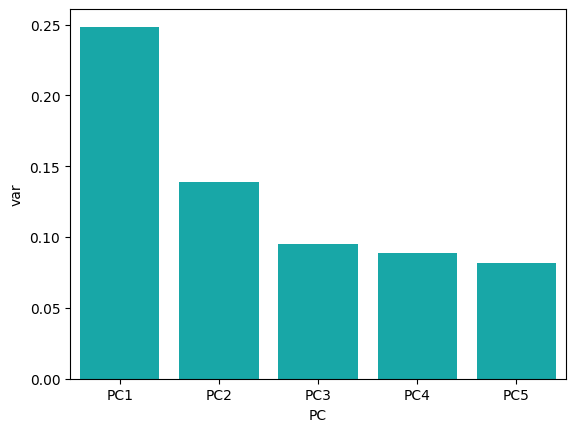

In [24]:
# Visualizacion de las PC
sns.barplot(x='PC',y="var",
           data=pd.DataFrame({'var':explained_variance,
             'PC':['PC1','PC2','PC3','PC4', 'PC5']}), color="c")

#x='PC' especifica que las etiquetas del eje x serán las componentes principales (PC1, PC2, etc.).
#y='var' indica que la altura de las barras representará la varianza explicada.
#data=pd.DataFrame(...) crea un DataFrame con las proporciones de varianza y las etiquetas de las componentes principales.
#color='c' establece el color de las barras como cian.

In [26]:
### Modelo de Regresión
# Con las PCA se construye un modelo de regresión

# Regresion Lineal
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_pca).fit()
model.summary() # Se ve que la PC realmente relevante es solo la primera

#model = sm.OLS(y_train, X_train_pca).fit(): Creamos un modelo de regresión lineal utilizando la función OLS (Mínimos Cuadrados Ordinarios) de statsmodels.
#y_train es la variable objetivo (variable dependiente).
#X_train_pca son las características transformadas utilizando PCA.
#.fit() ajusta el modelo a los datos de entrenamiento.
#model.summary(): Muestra un resumen detallado del modelo de regresión lineal.
#Esto incluye estadísticas como coeficientes, errores estándar, valores p, estadísticas R-cuadrado y más.
#se ve que la primera componente principal (PC1) es la más relevante.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.095
Model:                            OLS   Adj. R-squared (uncentered):              0.090
Method:                 Least Squares   F-statistic:                              17.70
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    1.05e-16
Time:                        20:28:25   Log-Likelihood:                         -11508.
No. Observations:                 845   AIC:                                  2.303e+04
Df Residuals:                     840   BIC:                                  2.305e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.721e+04   3970.502      9.372      0.000    2.94e+04     4.5e+04
x2          1550.6954   5310.565      0.292      0.770   -8872.840     1.2e+04
x3          2292.1656   6423.598      0.357      0.721   -1.03e+04    1.49e+04
x4          -833.0923   6652.193     -0.125      0.900   -1.39e+04    1.22e+04
x5          4719.8690   6913.081      0.683      0.495   -8849.072    1.83e+04
==============================================================================
Omnibus:                      316.504   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4291.928
Skew:                           1.309   Prob(JB):                         0.00
Kurtosis:                      13.726   Cond. No.                         1.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# RF
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca, y_train)
print("Relevancia de los parámetros")
print(model.feature_importances_) # Aparentemente con la primera componente artificial construida es suficiente

##Importación de la Biblioteca:
#from sklearn.ensemble import RandomForestRegressor: Importamos la clase RandomForestRegressor de la biblioteca scikit-learn.

##Creación del Modelo Random Forest:
#model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100): Creamos una instancia de RandomForestRegressor con los siguientes parámetros:
#max_depth=5: Limita la profundidad máxima de los árboles en el bosque a 5 niveles.
#random_state=0: Establece una semilla para la generación de números aleatorios, lo que garantiza que el modelo sea reproducible.
#n_estimators=100: Crea un bosque de 100 árboles.

##Entrenamiento del Modelo:
#model.fit(X_train_pca, y_train): Ajustamos el modelo a los datos de entrenamiento (X_train_pca y y_train).

##Relevancia de los Parámetros:
#print("Relevancia de los parámetros"): Muestra un encabezado para indicar que los siguientes valores son las importancias de las características.
#print(model.feature_importances_): Imprime las importancias de las características según el modelo Random Forest.
#Esto te ayudará a comprender qué características son más influyentes para predecir la variable objetivo.
#En tu caso, parece que la primera componente principal (PC1) es suficiente para construir un modelo predictivo.


Relevancia de los parámetros
[0.83549123 0.04545186 0.03010247 0.0459853  0.04296915]


In [30]:
# Predicciones sin usar el método PCA
y_pred = model.predict(X_test_pca)

# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

r2:  0.46509156602258606 mae:  2302968682.6760144


In [31]:
# Usando solo 1 PC
pca = PCA(n_components = 1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

Varianza Explicada por cada PC
[0.24854763]
Parámetros del Modelo
[[-0.10669997  0.29484302  0.20848705  0.41723899  0.49858494  0.51192037
   0.25634904  0.26825166 -0.17215409  0.02624888  0.07399804 -0.0015978 ]]


In [34]:
model = RandomForestRegressor(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae) # Mejoran, de hecho, los resultados

##Creación del Modelo Random Forest:
#model = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=100): Creamos una instancia de RandomForestRegressor con los siguientes parámetros:
#max_depth=5: Limita la profundidad máxima de los árboles en el bosque a 5 niveles.
#random_state=0: Establece una semilla para la generación de números aleatorios, lo que garantiza que el modelo sea reproducible.
#n_estimators=100: Crea un bosque de 100 árboles.

##Entrenamiento del Modelo:
#model.fit(X_train_pca, y_train): Ajustamos el modelo a los datos de entrenamiento (X_train_pca y y_train).

##Predicciones y Evaluación del Modelo:
#y_pred = model.predict(X_test_pca): Calculamos las predicciones en el conjunto de prueba.
#r2 = r2_score(y_test, y_pred): Calculamos el coeficiente de determinación (R2) para evaluar el rendimiento del modelo.
#mae = mean_squared_error(y_test, y_pred): Calculamos el error absoluto medio (MAE).

##Resultados:
#Después de ejecutar este código, verás los valores de R2 y MAE impresos en la consola.
#Si los valores mejoran en comparación con otros modelos o con el uso de todas las características originales,
#entonces el uso de las primeras componentes principales fue beneficioso.

r2:  0.4838564765524249 mae:  2222179152.0976634


In [35]:
# Usando 2 PC para visualizar
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por cada PC")
print(explained_variance)
print("Parámetros del Modelo")
print(pca.components_)

model = RandomForestRegressor(max_depth=5, random_state=0,
                               n_estimators=100)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

Varianza Explicada por cada PC
[0.24854763 0.13893733]
Parámetros del Modelo
[[-0.10669997  0.29484302  0.20848705  0.41723899  0.49858494  0.51192037
   0.25634904  0.26825166 -0.17215409  0.02624888  0.07399804 -0.0015978 ]
 [-0.4555225   0.51928677  0.43502287 -0.34937079 -0.10860442 -0.03374627
  -0.10764765 -0.08887951  0.28202868  0.10957175  0.29571177 -0.01107928]]
r2:  0.488549471073663 mae:  2201974162.3763056


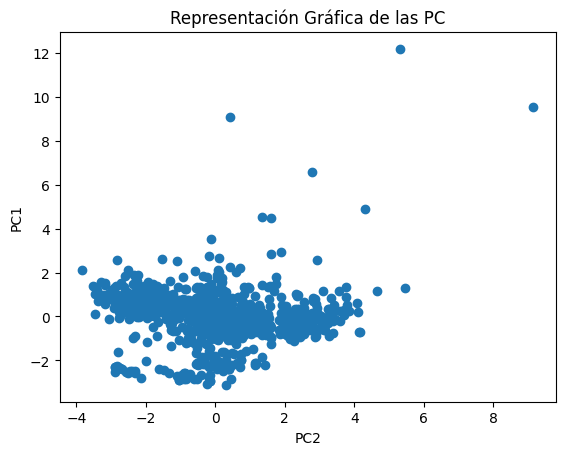

In [36]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.title("Representación Gráfica de las PC")
plt.show()